# Gauss_Jordan

https://www.youtube.com/watch?v=xOLJMKGNivU&ab_channel=mechtutorcom

In [1]:
import numpy as np 
# from sympy import Matrix, init_printing
# init_printing()

In [2]:
import numpy as np

def Gauss_Jordan(A, B):
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)

    n = B.shape[0]

    for k in range(n):
        if np.fabs(A[k, k]) < 10**(-12):
            for i in range(k + 1, n):
                if np.fabs(A[i, k]) > np.fabs(A[k, k]):
                    temp = np.copy(A[i, :])
                    A[i, :] = A[k, :]
                    A[k, :] = temp

                    temp = B[i]
                    B[i] = B[k]
                    B[k] = temp
        # Division of the pivot
        pivot = A[k, k]
        A[k, :] = A[k, :] / pivot
        B[k] = B[k] / pivot

        # elimination loop
        for i in range(n):
            if i == k:
                continue
            factor = A[i, k]
            A[i, :] = A[i, :] - factor * A[k, :]
            B[i] = B[i] - factor * B[k]

    return B, A

In [3]:
import numpy as np

A = [[0, 2, 0, 1], [2, 2, 3, 2],  [4, -3, 0, 1], [6, 1, -6, -5]]
B = [0, -2, -7, 6]


# ---------------------------------------
# Testing our Gauss_Jordan function
# ---------------------------------------
print("initial A = ")
print(np.array(A, dtype=float))
print()
print("initial B = ")
print(np.array(B, dtype=float))
print()

initial A = 
[[ 0.  2.  0.  1.]
 [ 2.  2.  3.  2.]
 [ 4. -3.  0.  1.]
 [ 6.  1. -6. -5.]]

initial B = 
[ 0. -2. -7.  6.]



In [5]:
new_B, new_A = Gauss_Jordan(A, B)
print("final B (value of X)= ")

final B (value of X)= 


inv(A) @ B


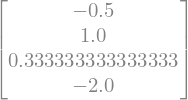

In [8]:
print("inv(A) @ B")
Matrix(np.matmul(np.linalg.inv(A),B))

In [7]:
print("final A (should be ideentity)= ")
# print(new_A)

final A (should be ideentity)= 


# QR_Demposition
https://www.youtube.com/watch?v=fdshjUzUWTs&ab_channel=DrJuanKlopper

## Gram Schmidt process


$$\mathbf{u_0} = \mathbf{A[:,0] / norm(A[:,0]}$$

$$\mathbf{u_k} = a_k - \sum_{i-1}^{k-1}\frac{\mathbf{a_k}.\mathbf{u_i}}{||\mathbf{u_i}||^2} \mathbf{u_i} \qquad \qquad for \: k = 1,2,...,n$$

$$\mathbf{u_k} = \frac{\mathbf{u_k}}{||\mathbf{u_k}||}  $$

We assume 
$$A = QR $$

$$ R = Q^{T} A \qquad as \: Q.Q^{T} = I $$

In [10]:
import numpy as np
from numpy.linalg import norm


def QR_Demposition(A):
    A = np.array(A, dtype=float)
    U = np.copy(A)
    m, n = A.shape

    temp_norm = norm(U[:, 0])
    U[:, 0] = U[:, 0] / temp_norm
    for j in range(1, n):
        for i in range(j):
            U[:, j] = U[:, j] - proj_x_onto_y(A[:, j], U[:, i]).reshape((1, -1))
        U[:, j] = U[:, j] / norm(U[:, j])
    Q = np.copy(U)
    R = np.matmul(np.transpose(Q), A)
    return Q, R


def proj_x_onto_y(x, y):
    """Gives projection of x onto y"""
    x = np.copy(x)
    y = np.copy(y)

    x = x.reshape(-1)
    y = y.reshape(-1)
    ans = np.sum(x * y)
    ans = ans / (norm(y)**2)
    ans = ans * y

    return ans


A = 


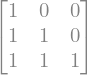

In [11]:
import numpy as np
from numpy.linalg import norm

A = [[1, 0, 0], [1, 1, 0], [1, 1, 1, ]]
# A = [[2, 3], [2, 4], [1, 1]]

print("A = ")
Matrix(A)

### Testing the QR_Demposition function

Q = 


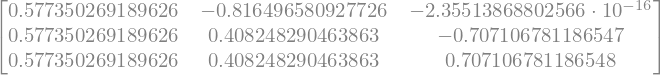

In [12]:
Q, R = QR_Demposition(A)
print("Q = ")
Matrix(Q)

R = 


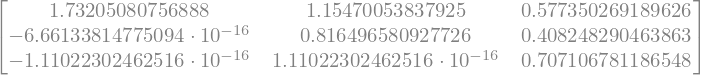

In [13]:
print("R = ")
Matrix(R)

transpose(Q)@Q = 


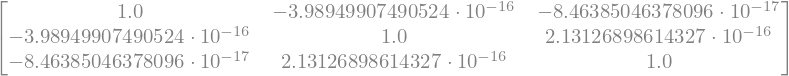

In [14]:
print("transpose(Q)@Q = ")
Matrix(np.matmul(np.transpose(Q),Q))

A,Q @ R = 


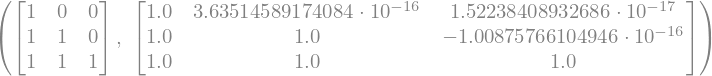

In [15]:
print("A,Q @ R = ")
Matrix(A), Matrix(np.matmul(Q,R))

### Standard QR_Demposition answer

Q_std = 


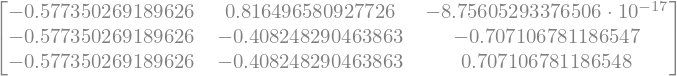

In [16]:
Q_std, R_std = np.linalg.qr(A)
print("Q_std = ")
Matrix(Q_std)

R_std = 


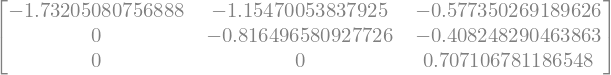

In [17]:
print("R_std = ")
Matrix(R_std)

## Comparision

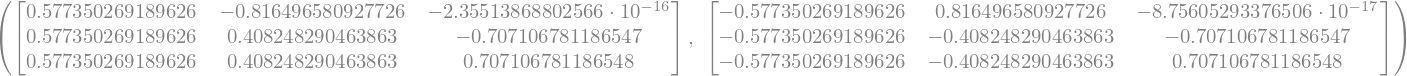

In [18]:
Matrix(Q), Matrix(Q_std)

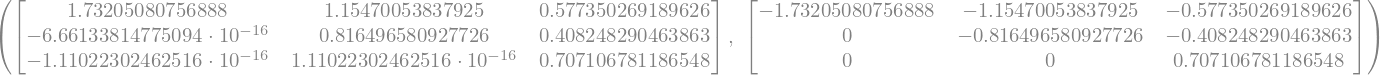

In [19]:
Matrix(R), Matrix(R_std)

# LU_Demposition

In [20]:
import numpy as np
def LU_Demposition(A):
    A = np.array(A, dtype=float)
    n = A.shape[0]
    A = np.array(A, dtype=float)

    L = np.identity(n)
    U = np.copy(A)

    for j in range(n - 1):
        for i in range(j + 1, n):
            factor = -1 * (U[i, j] / U[j, j])
            U[i, :] = U[i, :] + factor * U[j, :]
            L[i, j] = -1 * factor

    return L, U

In [21]:
import numpy as np

# A = [[4, -2, -3, 1], [1, 3, 1, 3], [1, 2, -1, -2], [2, 1, -1, -1]]
A = [[1, 5, 0, 0], [2, 12, 5, 0], [0, 4, 13, 5], [0, 0, 6, 11]]

### Testing the QR_Demposition function

A = 


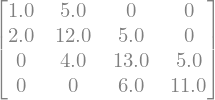

In [22]:
A = np.array(A, dtype=float)
print("A = ")
Matrix(A)

L = 


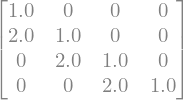

In [23]:
L, U = LU_Demposition(A)
print("L = ")
Matrix(L)



U = 


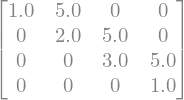

In [24]:
print()
print("U = ")
Matrix(U)

A, L@U 


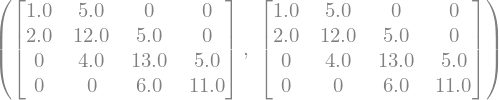

In [25]:
print("A, L@U ")
Matrix(A),Matrix(np.matmul(L, U))

### Standard LU_Demposition answer

In [26]:
import scipy.linalg

P_std, L_std, U_std = scipy.linalg.lu(A)

L, L_std


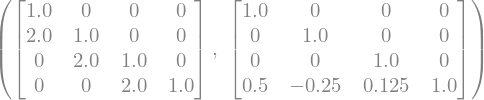

In [27]:
print("L, L_std")
Matrix(L), Matrix(L_std)

U, U_std


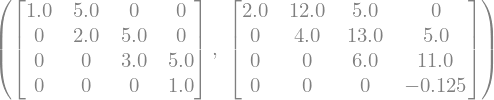

In [28]:
print("U, U_std")
Matrix(U), Matrix(U_std)